In [15]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [ ]:
import sys
sys.path.append('./../')
import VisualTransformer

model: tf.keras.Model = tf.keras.models.load_model('./models/mints10',
                                                custom_objects={
                                                      'ClassToken': VisualTransformer.ClassToken,
                                                      'AddPositionEmbs': VisualTransformer.AddPositionEmbs,
                                                      'MultiHeadSelfAttention': VisualTransformer.MultiHeadSelfAttention,
                                                      'TransformerBlock': VisualTransformer.TransformerBlock,
                                                      'ViT': VisualTransformer.ViT,
                                                    }
                                                ) # type: ignore

model.summary()

Model: "vit"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Conv2D)          multiple                  272       
                                                                 
 class_token (ClassToken)    multiple                  16        
                                                                 
 Transformer/posembed_input   multiple                 1040      
 (AddPositionEmbs)                                               
                                                                 
 Transformer/encoderblock_0   multiple                 1696      
 (TransformerBlock)                                              
                                                                 
 Transformer/encoderblock_1   multiple                 1696      
 (TransformerBlock)                                              
                                                               

# Transform 16x16 patch using dense layer?

In [15]:
model.layers

In [16]:
# output shape
[var.name for var in model.layers[2].variables]

['Transformer/posembed_input/pos_embedding:0']

In [17]:
# check shapes
for var in model.layers[2].variables:
    print(var.name, var.shape)

Transformer/posembed_input/pos_embedding:0 (1, 65, 16)


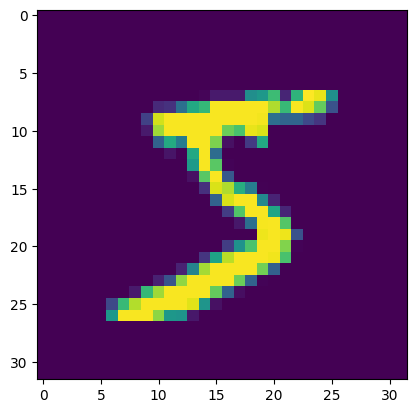

In [18]:
train, test = keras.datasets.mnist.load_data()

x_train, y_train = train

y_train = y_train.astype("float32")

x_train = np.pad(x_train, ((0, 0), (2, 2), (2, 2)), mode='constant', constant_values=0)
x_train = x_train.reshape(x_train.shape[0], 1, 32, 32)

x_test, y_test = test

y_test = y_test.astype("float32")

x_test = np.pad(x_test, ((0, 0), (2, 2), (2, 2)), mode='constant', constant_values=0)
x_test = x_test.reshape(x_test.shape[0], 1, 32, 32)

import matplotlib.pyplot as plt

sample = x_train[0].reshape(32, 32)

plt.imshow(sample)

(2, 8, 65, 65)
(2, 8, 65, 65)
(2, 8, 65, 65)
(2, 8, 65, 65)
(2, 8, 65, 65)
(2, 8, 65, 65)
(2, 8, 65, 65)
(2, 8, 65, 65)
(2, 8, 65, 65)
(2, 8, 65, 65)


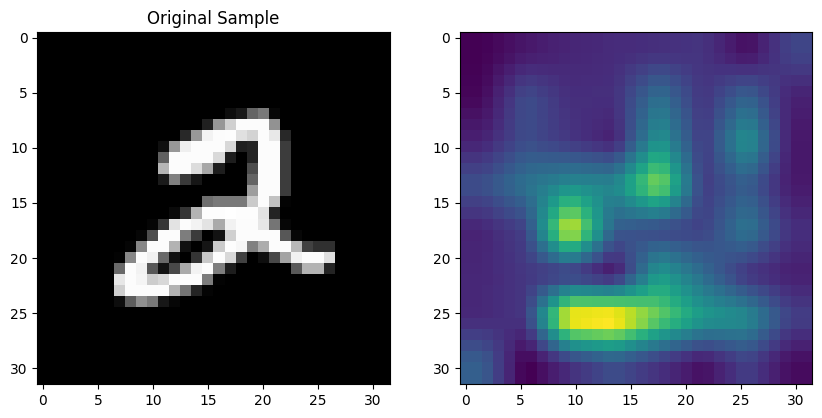

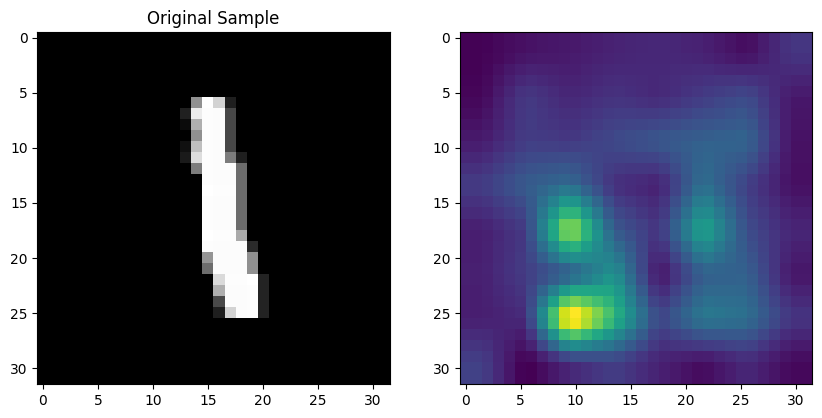

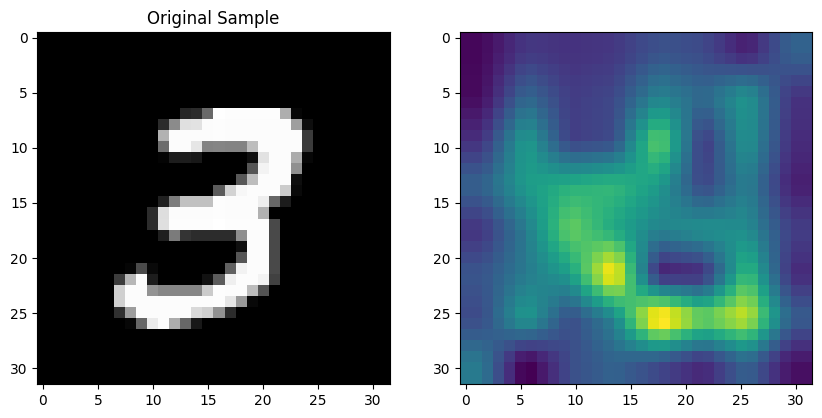

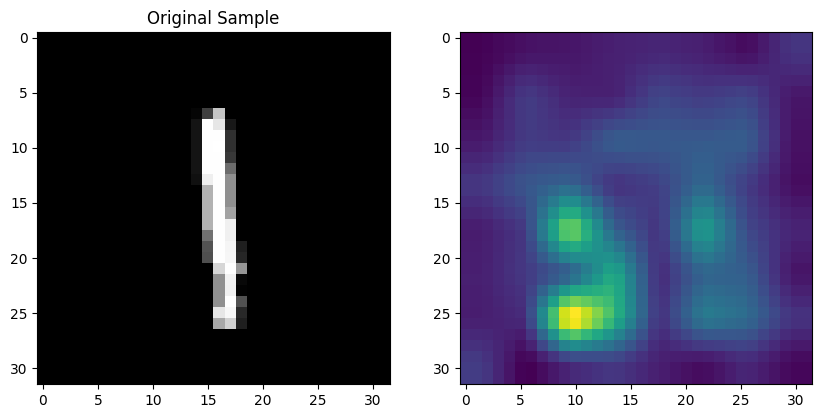

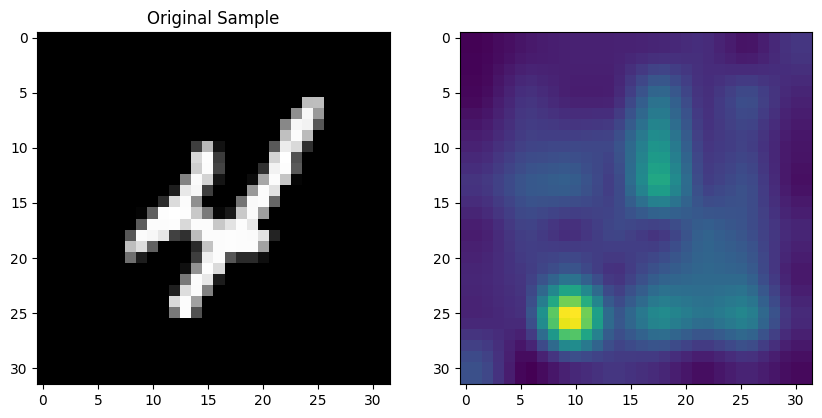

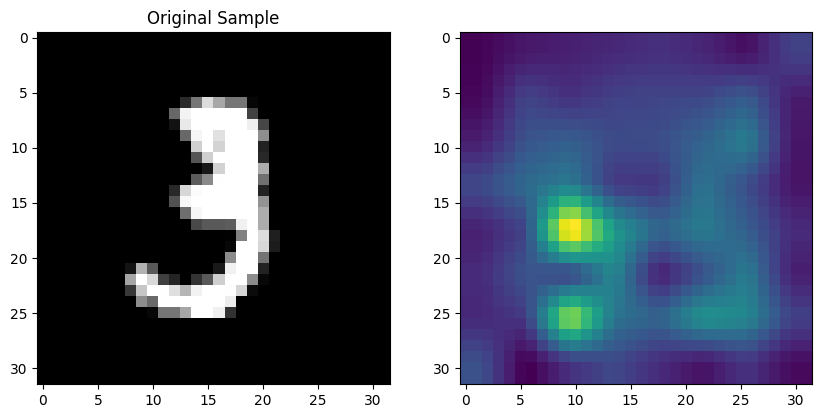

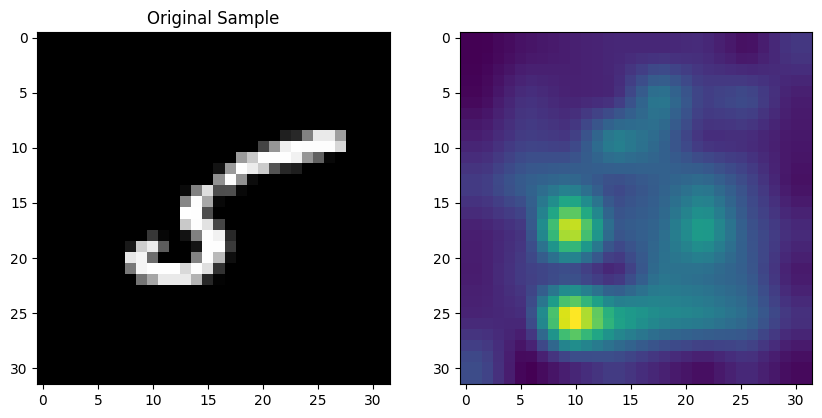

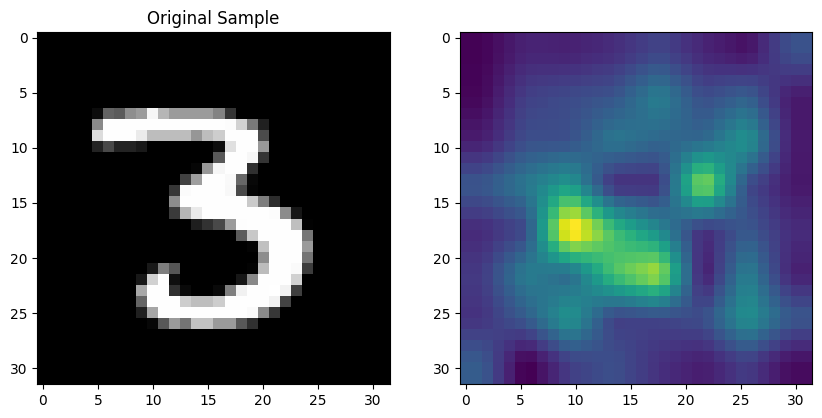

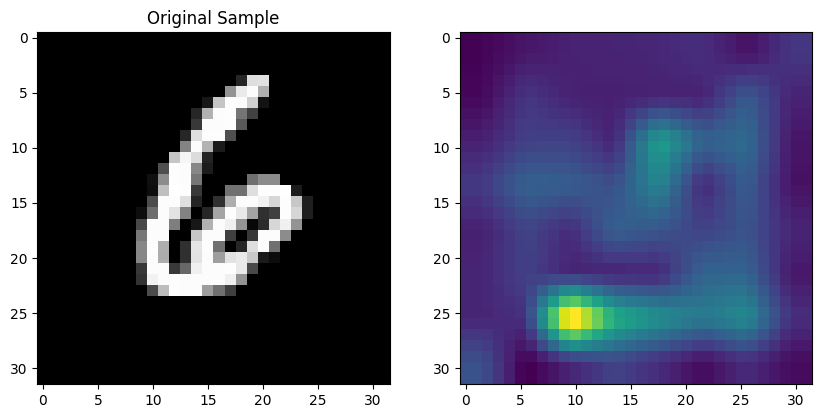

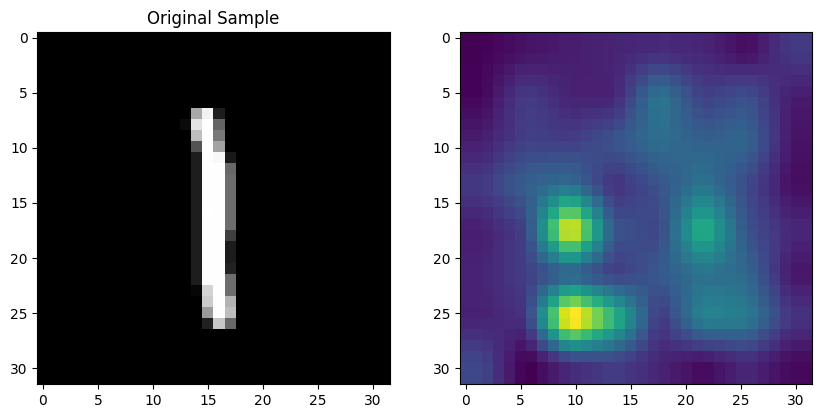

In [19]:
for i in range(5,15):
    sample = x_train[i].reshape(1, 32, 32, 1)

    plt.figure(figsize=(10, 5))

    # First plot: Original sample
    plt.subplot(1, 2, 1)
    plt.imshow(sample.reshape(32, 32, 1), cmap='gray')
    plt.title('Original Sample')

    sample = sample / 255.0
    sample = sample.astype('float32')
    sample = sample.reshape(32, 32, 1)

    # Second plot: Attention map
    attentions = vit_tests_2.attention_map(model, sample)

    # apply softmax to get probabilities for each patch

    plt.subplot(1, 2, 2)
    plt.imshow(attentions)


plt.show()